In [8]:
# 예제 6.1 신경망 학습을 구현하는 데 필요한 라이브러리 선언

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, datasets, models
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [20]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [87]:
len(test_images)

10000

In [47]:
# 예제 6.3 합성곱 신경망 구축하기

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [22]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.6253 - accuracy: 0.7925
Epoch 2/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.1988 - accuracy: 0.9384
Epoch 3/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.1252 - accuracy: 0.9613
Epoch 4/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0958 - accuracy: 0.9712
Epoch 5/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0776 - accuracy: 0.9759


In [23]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 3s - loss: 0.0719 - accuracy: 0.9775


In [24]:
print(test_acc)

0.9775000214576721


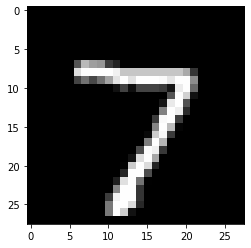

In [31]:
# 이미지 시각화
x = test_images[0].reshape([28,28])
plt.imshow(x, cmap = 'gray')
plt.show()

In [32]:
# 예제 6.10 합성곱 신경망이 0번째 손글씨 이미지를 예측하는 코드

predictions = model.predict(test_images)
predictions[0]
np.argmax(predictions[0])

7

In [35]:
# 예제 6.11 합성곱 신경망이 예측한 데이터 라벨과 실제 데이터 라벨을 비교하는 코드
print(test_labels[0])
print(np.argmax(predictions[0]))
print(np.argmax(predictions[0]) == test_labels[0])

7
7
True


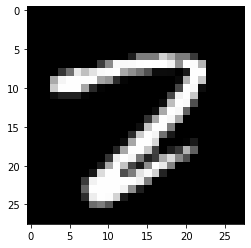

In [37]:
# 예제 6.12 테스트 데이터 924번을 시각화하는 코드

y = test_images[924].reshape([28,28])
plt.imshow(y, cmap = 'gray')
plt.show()

In [38]:
# 예제 6.11을 924번에 대해 실행한 결과

print(test_labels[924])
print(np.argmax(predictions[924]))
print(np.argmax(predictions[924]) == test_labels[924])
#책에는 다르게 나오는데 이 모델에선 같다고 나오네요.... 

2
2
True


In [93]:
for i in range(10000):
    if((np.argmax(predictions[i] == test_labels[i])) == 1):
        print(i)
# 혹시 이상하다면 알려주세요, 안나오네요..

In [48]:
for i in range(len(model.layers)):
	layer = model.layers[i]
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# summarize output shape
	print(i, layer.name, layer.output.shape)

0 conv2d_9 (None, 26, 26, 32)
2 conv2d_10 (None, 11, 11, 64)
4 conv2d_11 (None, 3, 3, 64)


In [50]:
layer_outputs = [layer.output for layer in model.layers]
layer_outputs

[<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv2d_9')>,
 <KerasTensor: shape=(None, 13, 13, 32) dtype=float32 (created by layer 'max_pooling2d_6')>,
 <KerasTensor: shape=(None, 11, 11, 64) dtype=float32 (created by layer 'conv2d_10')>,
 <KerasTensor: shape=(None, 5, 5, 64) dtype=float32 (created by layer 'max_pooling2d_7')>,
 <KerasTensor: shape=(None, 3, 3, 64) dtype=float32 (created by layer 'conv2d_11')>,
 <KerasTensor: shape=(None, 576) dtype=float32 (created by layer 'flatten_2')>,
 <KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'dense_4')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_5')>]

In [76]:
ixs = [0,2,4]
outputs = [model.layers[i].output for i in ixs]
outputs

[<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv2d_9')>,
 <KerasTensor: shape=(None, 11, 11, 64) dtype=float32 (created by layer 'conv2d_10')>,
 <KerasTensor: shape=(None, 3, 3, 64) dtype=float32 (created by layer 'conv2d_11')>]

In [77]:
model.inputs

[<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_9_input')>]

In [64]:
# feature_map_model = models.Model(input=model.inputs, output=model.layers[0].output)
feature_map_model = models.Model(inputs=model.inputs, outputs=outputs)

In [66]:
test_images[924].shape

(28, 28, 1)

In [72]:
feature_map_model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9_input (InputLayer)  [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_______________________________________________________

In [79]:
x = test_images[924]
input = tf.expand_dims(x, axis=0)
feature_map = feature_map_model.predict(input)

In [95]:
feature_map[0]

array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
    

In [96]:
feature_map[1]

array([[[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [2.67960040e-05, 0.00000000e+00, 0.00000000e+00, ...,
          1.61716514e-06, 0.00000000e+00, 0.00000000e+00],
         [1.16203046e-04, 0.00000000e+00, 0.00000000e+00, ...,
          7.43310068e-07, 0.00000000e+00, 0.00000000e+00],
         ...,
         [8.09021731e-05, 0.00000000e+00, 5.83676592e-05, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [9.51400216e-05, 0.00000000e+00, 5.28281307e-05, ...,
          3.43642896e-05, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 1.59178362e-05, ...,
          1.11214213e-04, 0.00000000e+00, 2.62272824e-05]],

        [[1.36132876e-04, 4.97503925e-06, 8.27242038e-05, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [1.52717446e-04, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        

In [98]:
feature_map[3] # layer 0,1,2 밖에 존재 안함

IndexError: ignored

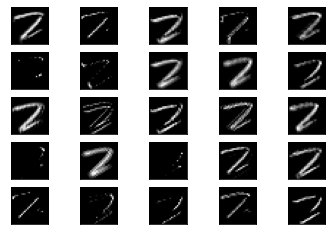

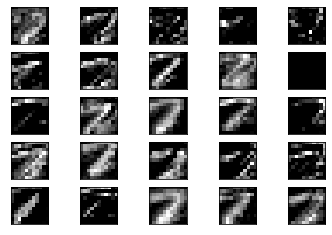

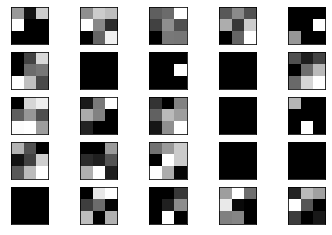

In [83]:
# https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/ 참고
square = 5
for fmap in feature_map:
	# plot all 5x5 square
	ix = 1
	for _ in range(square):
		for _ in range(square):
			# specify subplot and turn of axis
			ax = plt.subplot(square, square, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			plt.imshow(fmap[0, :, :, ix-1], cmap='gray')
			ix += 1
	# show the figure
	plt.show()